## Setup and Imports

In [49]:
import os
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import timm
from pathlib import Path

print("✅ All imports successful!")

✅ All imports successful!


## Configuration

In [50]:
# Configuration
MODEL_NAME = 'vit_small_patch16_224'
MODEL_PATH = 'model_small_ViT_all_15epoch.pth'
TEST_DIR = 'vit_data/13try'

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Data transforms (same as training)
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

print(f"Model: {MODEL_PATH}")
print(f"Test directory: {TEST_DIR}")

Using device: cpu
Model: model_small_ViT_all_15epoch.pth
Test directory: vit_data/13try


## Load Class Names from Training Data

In [51]:
# Load class names from the training directory structure
train_dataset = datasets.ImageFolder('vit_data/train')
class_names = train_dataset.classes
num_classes = len(class_names)

print(f"Number of classes: {num_classes}")
print(f"\nClass names:")
for i, name in enumerate(class_names):
    print(f"  {i}: {name}")

Number of classes: 17

Class names:
  0: Apple___Apple_scab
  1: Apple___Black_rot
  2: Apple___Cedar_apple_rust
  3: Apple___healthy
  4: Cherry_(including_sour)___Powdery_mildew
  5: Cherry_(including_sour)___healthy
  6: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
  7: Corn_(maize)___Common_rust_
  8: Corn_(maize)___Northern_Leaf_Blight
  9: Corn_(maize)___healthy
  10: Grape___Black_rot
  11: Grape___Esca_(Black_Measles)
  12: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
  13: Grape___healthy
  14: Potato___Early_blight
  15: Potato___Late_blight
  16: Potato___healthy


## Load Trained Model

In [52]:
# Load the model checkpoint
checkpoint = torch.load(MODEL_PATH, map_location=device, weights_only=False)

# Check if checkpoint is a state_dict or a full model
if isinstance(checkpoint, dict):
    # Checkpoint is a state_dict
    model = timm.create_model(MODEL_NAME, pretrained=False, drop_rate=0.2)
    num_ftrs = model.head.in_features
    model.head = nn.Sequential(
        nn.Dropout(0.2),
        nn.Linear(num_ftrs, num_classes)
    )
    model.load_state_dict(checkpoint)
else:
    # Checkpoint is a full model
    model = checkpoint

model = model.to(device)
model.eval()

print("✅ Model loaded successfully!")

✅ Model loaded successfully!


## Load Test Images

In [ ]:
# Load test images directly from directory
test_dir = Path(TEST_DIR)
if not test_dir.exists():
    raise FileNotFoundError(f"Directory {TEST_DIR} does not exist!")

# Get all image files
image_extensions = ['.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG']
image_files = []
for ext in image_extensions:
    image_files.extend(list(test_dir.glob(f'*{ext}')))
    image_files.extend(list(test_dir.glob(f'*/*{ext}')))

image_files = sorted(set(image_files))

print(f"✅ Found {len(image_files)} images")

✅ Found 33 images in vit_data/13try

Image files:
  - AppleCedarRust1.JPG
  - AppleCedarRust2.JPG
  - AppleCedarRust3.JPG
  - AppleCedarRust4.JPG
  - AppleScab1.JPG
  - AppleScab2.JPG
  - AppleScab3.JPG
  - CornCommonRust1.JPG
  - CornCommonRust2.JPG
  - CornCommonRust3.JPG
  - PotatoEarlyBlight1.JPG
  - PotatoEarlyBlight2.JPG
  - PotatoEarlyBlight3.JPG
  - PotatoEarlyBlight4.JPG
  - PotatoEarlyBlight5.JPG
  - PotatoHealthy1.JPG
  - PotatoHealthy2.JPG
  - TomatoEarlyBlight1.JPG
  - TomatoEarlyBlight2.JPG
  - TomatoEarlyBlight3.JPG
  - TomatoEarlyBlight4.JPG
  - TomatoEarlyBlight5.JPG
  - TomatoEarlyBlight6.JPG
  - TomatoHealthy1.JPG
  - TomatoHealthy2.JPG
  - TomatoHealthy3.JPG
  - TomatoHealthy4.JPG
  - TomatoYellowCurlVirus1.JPG
  - TomatoYellowCurlVirus2.JPG
  - TomatoYellowCurlVirus3.JPG
  - TomatoYellowCurlVirus4.JPG
  - TomatoYellowCurlVirus5.JPG
  - TomatoYellowCurlVirus6.JPG


## Run Predictions and Display Results

In [ ]:
# Run predictions on all images
results = []

for img_path in image_files:
    # Load and preprocess image
    img = Image.open(img_path).convert('RGB')
    img_tensor = data_transforms(img).unsqueeze(0).to(device)
    
    # Make prediction
    with torch.no_grad():
        outputs = model(img_tensor)
        probabilities = torch.softmax(outputs, dim=1)
        pred_prob, pred_idx = torch.max(probabilities, 1)
        
        # Get predicted class name
        pred_idx_value = pred_idx.item()
        if pred_idx_value < len(class_names):
            pred_label = class_names[pred_idx_value]
        else:
            pred_label = f"Class_{pred_idx_value}"
        
        confidence = pred_prob.item()
    
    # Store results
    results.append({
        'filename': img_path.name,
        'image_path': str(img_path),
        'predicted_label': pred_label,
        'confidence': confidence
    })

print(f"✅ Processed {len(results)} images")

🔍 Running predictions...

❓ Image 1/33:
   Filename: AppleCedarRust1.JPG
   True Label (from filename): Unknown
   Predicted Label:            Apple___Cedar_apple_rust
   Confidence:                 42.85%

❓ Image 2/33:
   Filename: AppleCedarRust2.JPG
   True Label (from filename): Unknown
   Predicted Label:            Apple___Cedar_apple_rust
   Confidence:                 71.65%

❓ Image 3/33:
   Filename: AppleCedarRust3.JPG
   True Label (from filename): Unknown
   Predicted Label:            Apple___Cedar_apple_rust
   Confidence:                 90.17%

❓ Image 4/33:
   Filename: AppleCedarRust4.JPG
   True Label (from filename): Unknown
   Predicted Label:            Apple___Cedar_apple_rust
   Confidence:                 98.04%

❓ Image 5/33:
   Filename: AppleScab1.JPG
   True Label (from filename): Unknown
   Predicted Label:            Apple___Cedar_apple_rust
   Confidence:                 37.78%

❓ Image 6/33:
   Filename: AppleScab2.JPG
   True Label (from filename): U

## View Results with Images

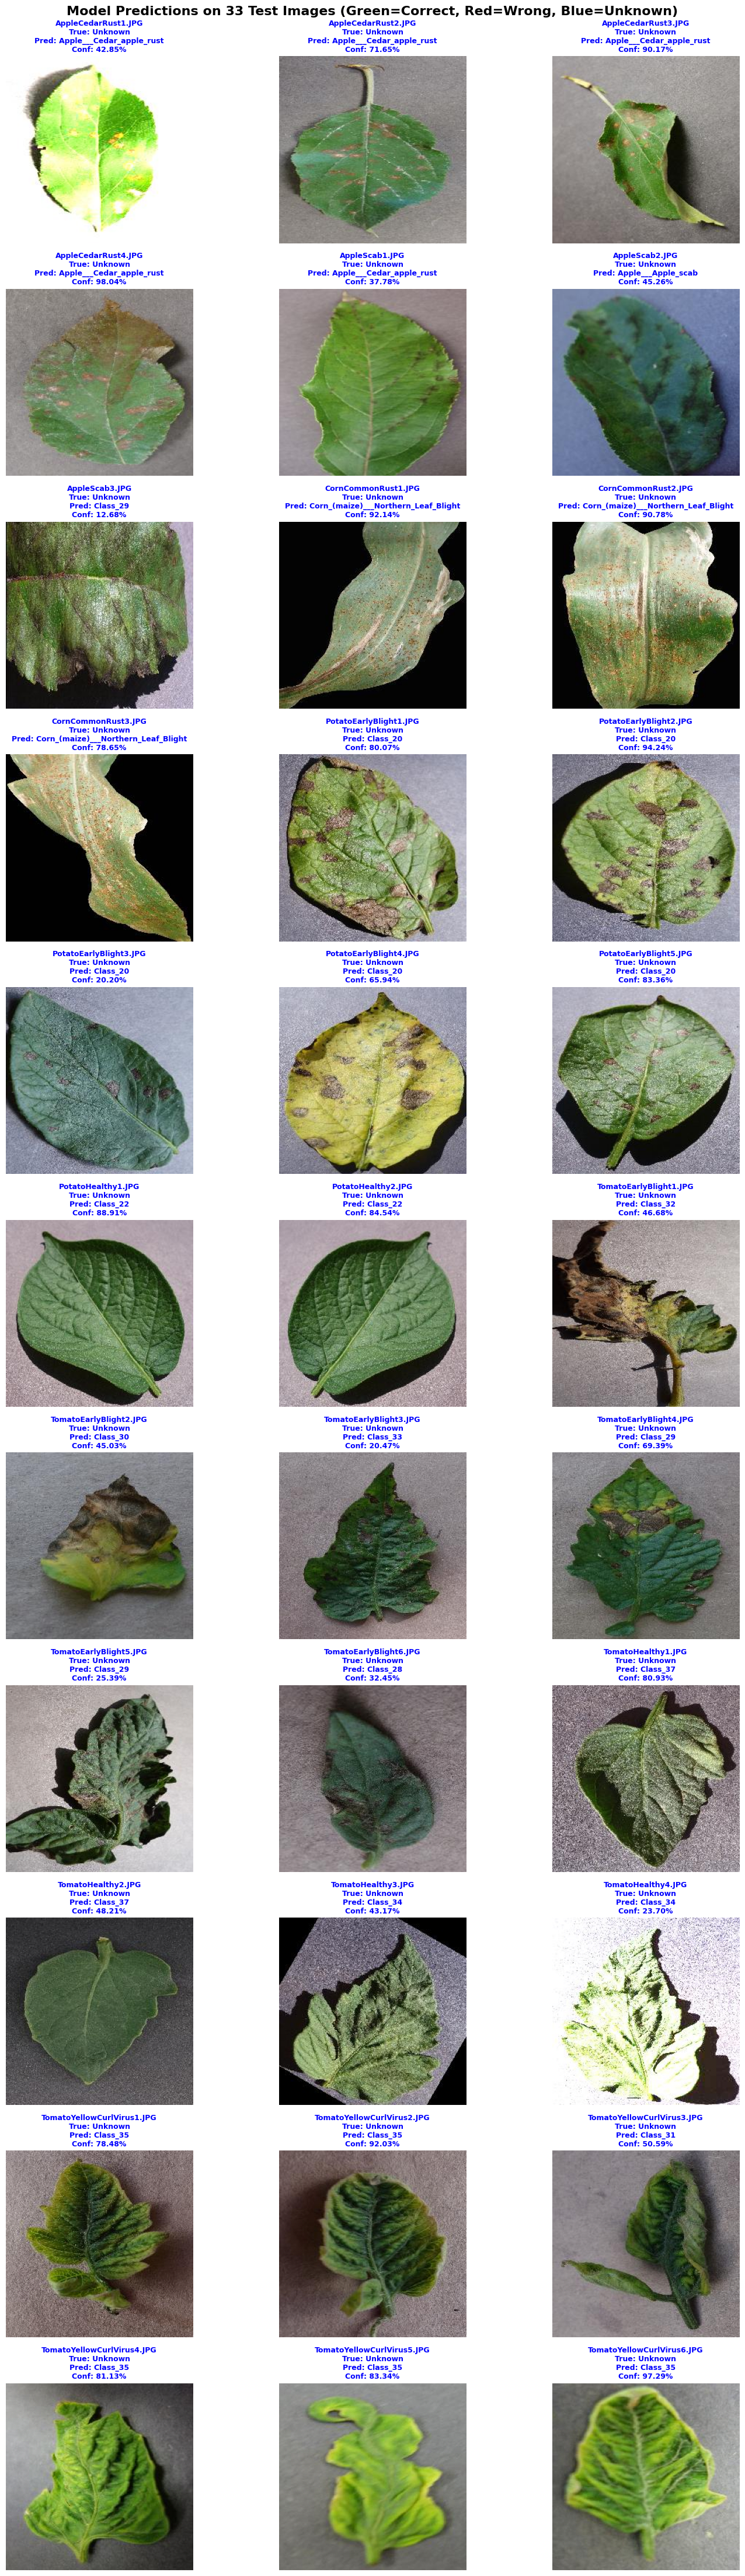

In [ ]:
# Display all predictions with images
num_images = len(results)
cols = 3
rows = (num_images + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten() if num_images > 1 else [axes]

for idx, result in enumerate(results):
    # Load image
    img = Image.open(result['image_path']).convert('RGB')
    
    # Plot
    ax = axes[idx]
    ax.imshow(img)
    
    # Title with filename and prediction
    title = f"{result['filename']}\n"
    title += f"Prediction: {result['predicted_label']}\n"
    title += f"Confidence: {result['confidence']:.1%}"
    
    ax.set_title(title, fontsize=10, fontweight='bold')
    ax.axis('off')

# Hide extra subplots
for idx in range(num_images, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## Results Summary

In [ ]:
# Show results in a table
import pandas as pd

results_df = pd.DataFrame([
    {
        'Filename': r['filename'],
        'Predicted Disease': r['predicted_label'],
        'Confidence': f"{r['confidence']:.1%}"
    }
    for r in results
])

print("\n📋 Prediction Results:\n")
print(results_df.to_string(index=False))
print(f"\n✅ Total: {len(results)} images processed")


📋 Detailed Results Table:

   Image                   Filename True Label                     Predicted Label Confidence Correct
 Image 1        AppleCedarRust1.JPG    Unknown            Apple___Cedar_apple_rust     42.85%       ❓
 Image 2        AppleCedarRust2.JPG    Unknown            Apple___Cedar_apple_rust     71.65%       ❓
 Image 3        AppleCedarRust3.JPG    Unknown            Apple___Cedar_apple_rust     90.17%       ❓
 Image 4        AppleCedarRust4.JPG    Unknown            Apple___Cedar_apple_rust     98.04%       ❓
 Image 5             AppleScab1.JPG    Unknown            Apple___Cedar_apple_rust     37.78%       ❓
 Image 6             AppleScab2.JPG    Unknown                  Apple___Apple_scab     45.26%       ❓
 Image 7             AppleScab3.JPG    Unknown                            Class_29     12.68%       ❓
 Image 8        CornCommonRust1.JPG    Unknown Corn_(maize)___Northern_Leaf_Blight     92.14%       ❓
 Image 9        CornCommonRust2.JPG    Unknown Corn_(m

## Results Summary

In [ ]:
# Show results in a table
import pandas as pd

results_df = pd.DataFrame([
    {
        'Filename': r['filename'],
        'Predicted Disease': r['predicted_label'],
        'Confidence': f"{r['confidence']:.1%}"
    }
    for r in results
])

print("\n📋 Prediction Results:\n")
print(results_df.to_string(index=False))
print(f"\n✅ Total: {len(results)} images processed")

🎯 Top-5 Predictions for Each Image:


Image 1: AppleCedarRust1.JPG
True Label: Unknown

👉 1. Apple___Cedar_apple_rust                           42.85%
   2. Class_23                                           16.40%
   3. Class_36                                           5.99%
   4. Class_30                                           5.25%
   5. Class_17                                           4.86%
--------------------------------------------------------------------------------

Image 2: AppleCedarRust2.JPG
True Label: Unknown

👉 1. Apple___Cedar_apple_rust                           71.65%
   2. Cherry_(including_sour)___healthy                  7.43%
   3. Apple___Black_rot                                  4.39%
   4. Corn_(maize)___healthy                             2.72%
   5. Apple___healthy                                    2.01%
--------------------------------------------------------------------------------

Image 3: AppleCedarRust3.JPG
True Label: Unknown

👉 1. Apple___Ceda


🔄 Prediction Breakdown by True Label:


True Label: Unknown
  ❌ Predicted as Apple___Cedar_apple_rust: 5/33 (15.2%)
  ❌ Predicted as Class_20: 5/33 (15.2%)
  ❌ Predicted as Class_35: 5/33 (15.2%)
  ❌ Predicted as Class_29: 3/33 (9.1%)
  ❌ Predicted as Corn_(maize)___Northern_Leaf_Blight: 3/33 (9.1%)
  ❌ Predicted as Class_22: 2/33 (6.1%)
  ❌ Predicted as Class_37: 2/33 (6.1%)
  ❌ Predicted as Class_34: 2/33 (6.1%)
  ❌ Predicted as Apple___Apple_scab: 1/33 (3.0%)
  ❌ Predicted as Class_32: 1/33 (3.0%)
  ❌ Predicted as Class_30: 1/33 (3.0%)
  ❌ Predicted as Class_33: 1/33 (3.0%)
  ❌ Predicted as Class_28: 1/33 (3.0%)
  ❌ Predicted as Class_31: 1/33 (3.0%)
